### Warm-up Exercises:

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### - Has the network latency gone up since we switched internet service providers?


- H(null) hypothesis: There's no difference or latency decreased in network speed since switching one company to the next.
    
- H(a) hypothesis: There is an increase in latency since switching from one company to the next.

- True Negative Type 1 Error example: We reject the H(null) that there is no difference of latency, when there really is.

- False Negative Type 2 Error example: We fail to reject the H(null), by saying that there is a speed difference but the reality is that we also had added 1,000 more computers to the network too and THAT was why the speed decreased...not the network. 

- True Positive: I determined that the network latency has increased and it has.

- True Negative: I determined that the network latency has decreased or is no different, and it is true.


 { This example would be determined by a <b> Paired t-test</b>.  Where we look at our data under the previous condition and then look at the sample data under the current condition } 

#### - Is the website redesign any good?

- <i>Rephrasing: What webpages are most customers engaged on and on avg, how long are they on our website?</i>

- H(null)hypothesis: There are no customers coming to the website and engaging.
    
- H(a)hypothesis: There are x amount of customers that are on our webpages an average x amount of time AND navigating throughout pages.
    
- Type 1 error example: We say "Yes, we have x amount of customers visitng for x amount of time", but find that the IP addresses vists are bots.
    
- Type 2 error example: We say "No-one is coming to our site, or the wanted engagement isn't being met" and do not take into account that we are only testing on weekend days.

- True Positive: I determined that there was an increase of number of daily visits and it has.

- True Negative: I determined that there was no change (or a decrease) in the number of daily visits and it has

{Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign. (like when, why, how of changing a website)

Sometimes perfect comparisons are not achievable in the rapidly changing business world.

We need to understand that as data scientists, we need to NOT claim "this has increased due to ___", but rather saying "the data shows that there is a relationship that shows an increase after the website redesign"...because we really don't know the causality until further experiments.}

#### - Is our television ad driving more sales?

- <i> Rephrasing: Have we since seen an increase of sales since our tv ad has aired? How can we determine where our customers are coming from?
    
- H(null)hypothesis: There is no increase in sales since our ad aired.
    
-H(a)hypothesis: We have made x amount of sales since our ad aired date, AND we can track that the sales are directly related to the tv ad.
    
- True Negative example: I determine sales volume has stayed the same or decreased and it has.
    
- True Positive: I determine sales volume has increased and it did.
    
- Type 1 Error: I determine sales volume has increased when it actually decreased.
    
- Type 2 Error: I determine sales volume has decreased when it has actualy increased.

 ____________________________________________________

## Exercises : T-test

### Exercise One:

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.

In [91]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
import pydataset
𝛼  = 0.05

#office1
mean1 = 90
sdev1 = 15
ssize1 = 40

#office2
mean2 = 100
sdev2 = 20
ssize2 = 50

### What are we comparing?

- average time (numberic continuous values)for two different groups(categories)
- One sample or two?
- One tailed or two tailed?


In [2]:
# H_0: Average time to sell at office 1 == average time to sell at office 2
#H_a: Average time to sell at office 1 != average time to sell at office 2
t,p=stats.stats.ttest_ind_from_stats(mean1, sdev1, ssize1, mean2, sdev2, ssize2, equal_var=True)

In [3]:
alpha = 0.05

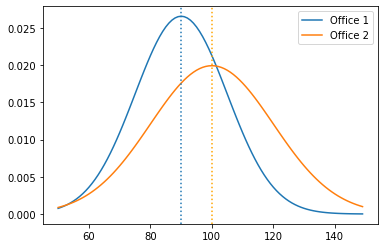

In [4]:
# visualize distributions

x = np.arange(50,150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x,y1,label= 'Office 1')
plt.plot(x,y2,label = 'Office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [5]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t,p

(-2.7091418459143854, 0.00811206270346016)

In [6]:
if (p < alpha ):
    print ("We reject the null hypothesis!")
else:
    print("We accept the null hypothesis!")

We reject the null hypothesis!


### Exercise Two:
Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [7]:
from pydataset import data
mpg = data('mpg')

In [8]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
#H_0: There is no difference in fuel efficiency in cars from 2008 and 1999
#H-a: There is a difference in fuel efficiency in cars from 2008 and 1999

How should we measure "fuel-efficiency"?
Two approaches:
    - Run two ttests: one for highway and one for city
    - Run one ttest: using mean for highway and city...

In [11]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [12]:
#getting cars based on the year
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

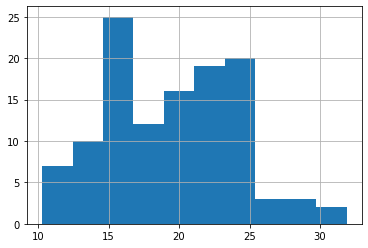

In [13]:
#let's plot!
fe_2008.hist()

<AxesSubplot:>

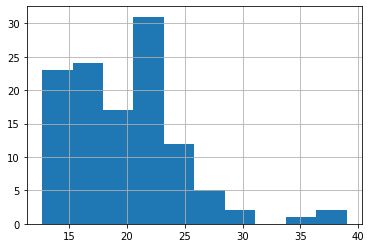

In [14]:
fe_1999.hist()

In [15]:
fe_2008.count()

117

In [16]:
fe_1999.count() #normality not the issue...same sample sized

117

In [17]:
#Let's compare the variance on both data/charts
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [18]:
#Levenes Test: 
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [19]:
#Let's calculate the t & p
t, p = stats.ttest_ind(fe_2008, fe_1999)

In [20]:
if p < alpha:
    print('Reject null')
else:
    print('fail to reject null')

fail to reject null


In [21]:
#let's look at each mean....
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

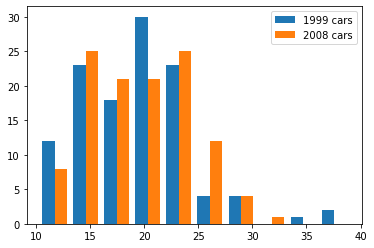

In [22]:
#let's plot out the data
plt.hist([fe_1999, fe_2008], label=['1999 cars', '2008 cars'])
plt.legend(loc='upper right')

### B) Are compact cars more fuel-efficient than the average car?

In [23]:
# H_0: MPG for compact cars <= mpg for the average car
# H_a: MPG for compact cars > mpg for the average car

In [24]:
#let's look at and find the avg mean for compact cars
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [25]:
#here's the population mean of all cars
pop_mean

19.585525317633177

In [26]:
#here's compact cars' mean:
fe_compact.mean()

23.500416808701296

<AxesSubplot:>

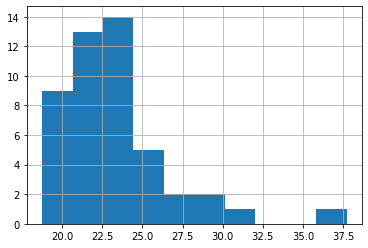

In [27]:
# just by comparisons, the compact car seems to have a higher mean...let's now plot it:
fe_compact.hist()

In [28]:
#let's find the t and p of the two variables (pop mean, and compact cars mean)
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [29]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

Reject null


### C) Do manual cars get better gas mileage than automatic cars?

In [30]:
mpg.head() #let's look at what we have to work with...

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [31]:
mpg.trans.value_counts() # we will take a look at transmissions on cars..

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [32]:
#We will create two avg variables (trans: auto and trans: manual)
fe_auto=mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual=mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

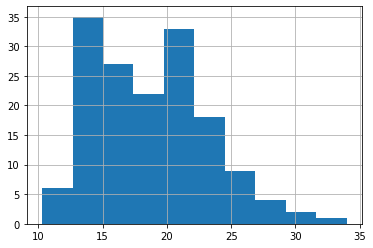

In [33]:
#now let's graph them
fe_auto.hist()

<AxesSubplot:>

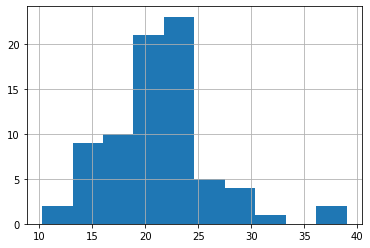

In [34]:
fe_manual.hist()

In [35]:
#now compare variances:
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [36]:
#Levene Test:
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [37]:
#because we fail to reject our null, we can set our variances True equal (there is a range in the Levene test, but it's based on the shape of our distribution)
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [38]:
#Let's take a look at our means of both selected variables
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [39]:
#We will add a new column to have a clean column to plot
mpg['transmisson_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

In [40]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,transmisson_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,Auto Transmission
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,Manual Transmission
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,Manual Transmission
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,Auto Transmission
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,Auto Transmission


Text(0.5, 1.0, 'Manual transmission get better fuel effiency')

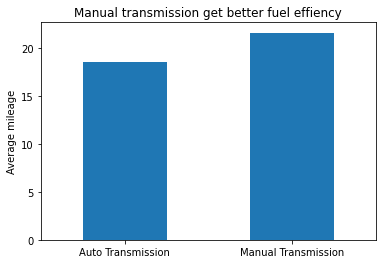

In [41]:
mpg.groupby('transmisson_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission get better fuel effiency')

## Correlation Exercises:

### Exercise 1)
Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import scipy.stats as stats
df = pd.read_csv("Copy of Jennifer Eyring - jemison_spreadsheet_exercises - Table1_Copy.csv")

In [43]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_internet,partner_dependants,avg_monthly_charges,validate,phone_service_type,Internet Service,Contract Type,rounded_tenure,Service Type,Tenure Bins
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Internet + Phone,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,0,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,Internet + Phone,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet + Phone,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet + Phone,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet + Phone,NaN


In [44]:
#renamed to call on later
df=df.rename(columns={"Service Type": "service_type"})
df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_internet,partner_dependants,avg_monthly_charges,validate,phone_service_type,Internet Service,Contract Type,rounded_tenure,service_type,Tenure Bins
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Internet + Phone,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,True,0,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,Internet + Phone,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet + Phone,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet + Phone,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet + Phone,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,...,True,0,55.15,TRUE,One Line,DSL,1 Year,13.0,Internet + Phone,NaN
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,True,1,85.1,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,22.0,Internet + Phone,NaN
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,...,True,0,50.3,TRUE,One Line,DSL,Month-to-Month,2.0,Internet + Phone,NaN
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,...,True,2,67.85,TRUE,One Line,DSL,2 Year,68.0,Internet + Phone,NaN


### Does Tenure relate to Monthly Charges?

H0: There is no relation to Monthly charges and tenure
Ha: There is a relation to Monthly charges and tenure

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

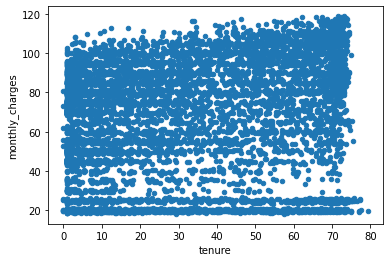

In [45]:
df.plot.scatter(y='monthly_charges', x='tenure')

In [46]:
alpha = 0.05

In [47]:
x = df.tenure
y = df.monthly_charges

In [48]:
r, p = stats.pearsonr(x,y)
r,p

(0.24718489224989926, 1.2811368994964528e-98)

<b> Conclusion: There is a weak relationship between monthly charges and tenure but it is there.
- Reject the null hypothesis</b>

In [49]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to rejcet the null hypothesis')

Reject the null hypothesis


### Does Tenure relate to Total Charges?

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

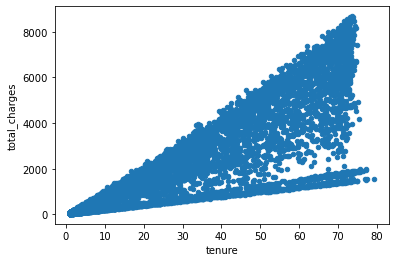

In [50]:
df.plot.scatter(y='total_charges', x='tenure')
#visually, yes it looks like there might be a relationship between total and tenure

In [51]:
x = df.tenure
y = df.total_charges
#to drop nulls, look at spaces needing to be replaced,drop na mehtod (subset dataframe for two variables)

In [52]:
##cleaning data for any spaces...
df['tenure']= df.tenure.replace(' ',np.nan)
df['total_charges']= df.total_charges.replace(" ",np.nan)

In [53]:
df_xy=df[['tenure','total_charges','service_type']].dropna()
df_xy

,tenure,total_charges,service_type
0,9.0,593.30,Internet + Phone
1,9.1,542.40,Internet + Phone
2,3.8,280.85,Internet + Phone
3,12.6,1237.85,Internet + Phone
4,3.2,267.40,Internet + Phone
...,...,...,...
7044,13.5,742.90,Internet + Phone
7045,22.0,1873.70,Internet + Phone
7046,1.8,92.75,Internet + Phone
7047,68.2,4627.65,Internet + Phone


In [54]:
x=df_xy.tenure
y=df_xy.total_charges

In [55]:
r, p = stats.pearsonr(x,y)
r,p

(0.8258191824783676, 0.0)

#### Conclusion: There is a strong positive correlation between tenure and total_charges

In [56]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to rejcet the null hypothesis')

Reject the null hypothesis


### What happens if I control for phone and internet service?

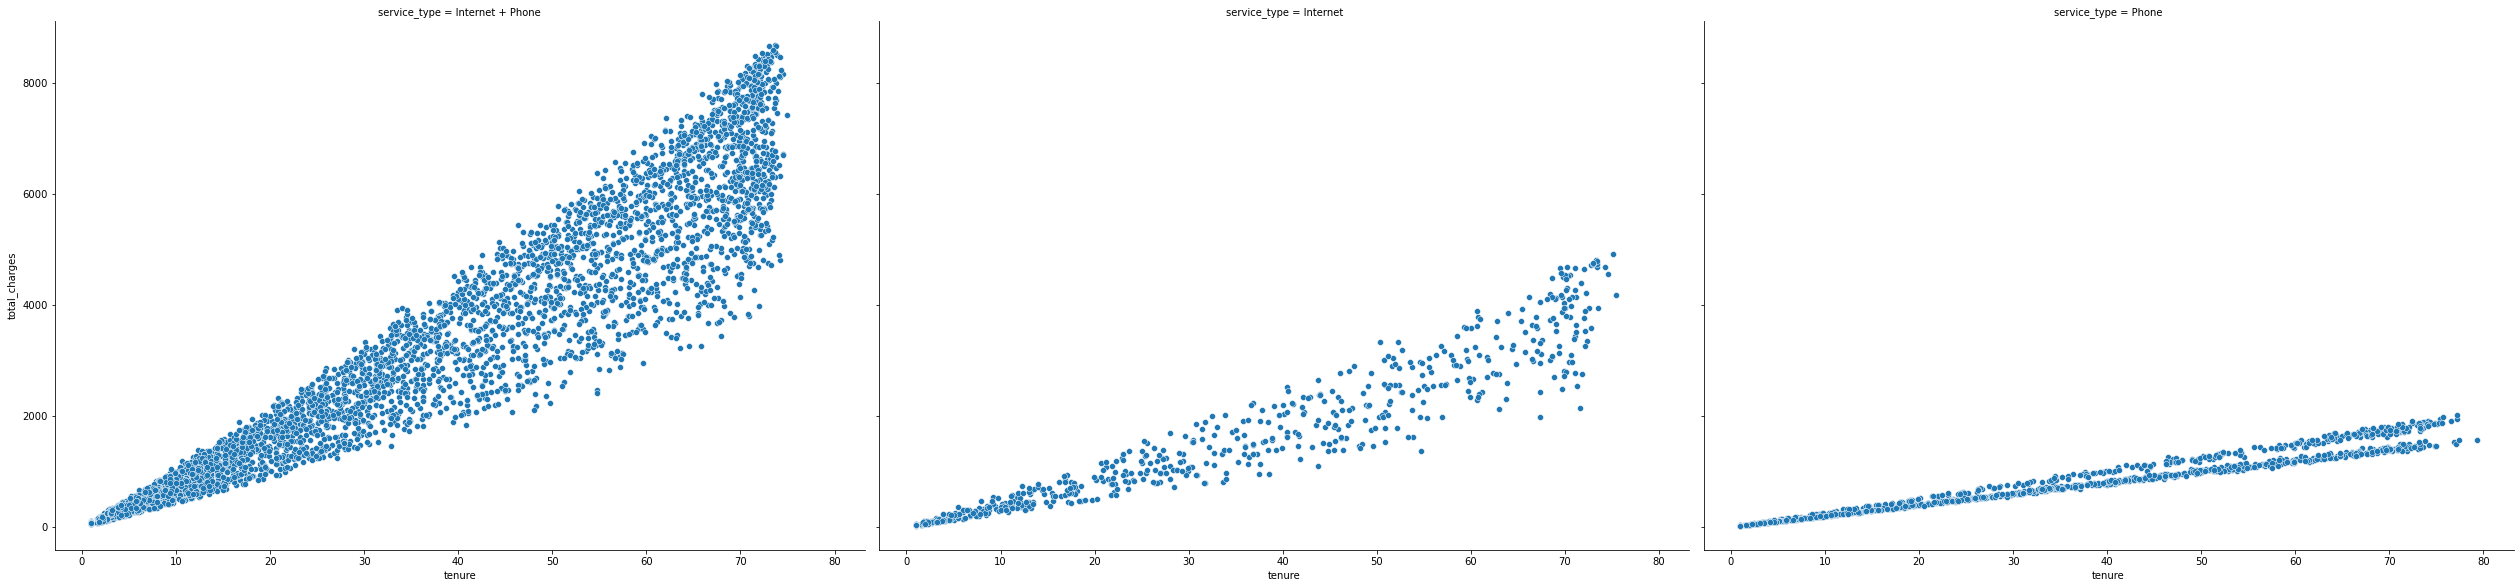

In [57]:
sns.relplot(data=df_xy, y='total_charges', x='tenure', col='service_type',height=8.27, aspect=11.7/8.27)

In [58]:
df_xy.value_counts('service_type')

service_type
Internet + Phone    4834
Phone               1523
Internet             681
dtype: int64

In [59]:
phone=df_xy[df_xy.service_type == 'Phone']
Internet=df_xy[df_xy.service_type == 'Internet']

In [60]:
r, p = stats.pearsonr(phone.tenure, phone.total_charges)
print('Phone Customers')
print('  r =', r)
print('  p =', p)

Phone Customers
  r = 0.9843017870543525
  p = 0.0


In [61]:
r, p = stats.pearsonr(Internet.tenure, Internet.total_charges)
print('Internet Customers')
print('  r =', r)
print('  p =', p)

Internet Customers
  r = 0.9543062640520065
  p = 0.0


### Exercise 2)

In [62]:
import pandas as pd
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

salaries = pd.read_sql('SELECT * FROM salaries', url)
titles = pd.read_sql('SELECT * FROM titles', url)
employees = pd.read_sql('SELECT * FROM employees', url)

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?

In [73]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''

In [74]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [75]:
employees_with_salaries = pd.read_sql(query, url)

In [76]:
employees_with_salaries

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692
...,...,...
240119,2572,52868
240120,3410,69501
240121,5030,83441
240122,2298,55003


H0: There is no linear relationship between employee tenure and their salary

Ha: There is a linear relationship between employee tenure and their salary

In [77]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.3064625613186077, 0.0)

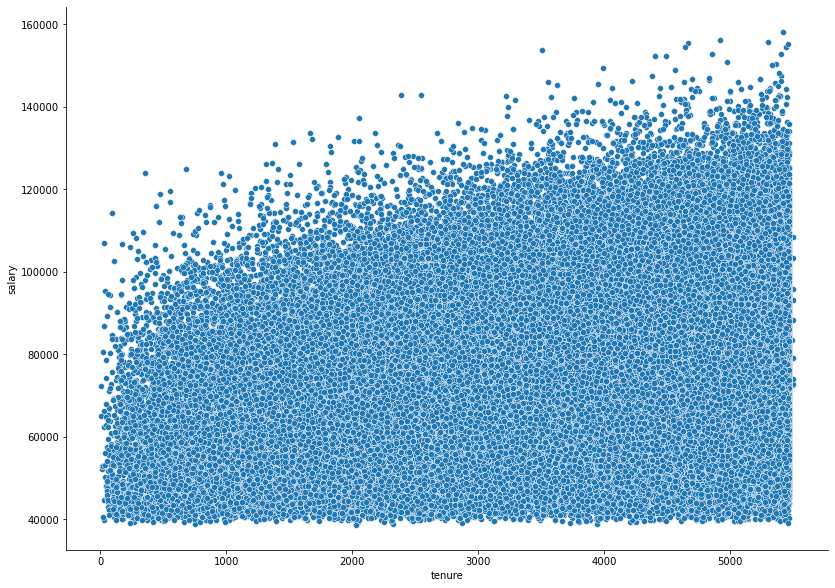

In [79]:
sns.relplot(data=employees_with_salaries, y='salary', x='tenure',height=8.27, aspect=11.7/8.27)

We Reject the Null Hypothesis, but see that the correlation is weak to the positive direction. 

<b>- Is there a relationship between how long an employee has been with the company and the number of titles they have had?</b>

In [80]:
query = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''

In [81]:
employees_with_titles = pd.read_sql(query,url)

In [87]:
employees_with_titles.shape

(300024, 3)

In [88]:
employees_with_titles.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


#Form our null and alternative Hypothesis

H0: there is no linear relationship between employee tenure and number of titles they held
Ha: there IS a linear relationship between employee tenure and number of titles a person has held

In [89]:
stats.pearsonr(employees_with_titles.tenure, employees_with_titles.n_titles)

(0.26659892991366185, 0.0)

p-value is > 0.05: We reject the Null Hypothesis

### Sleep Study

Is there a relationship between days and reaction time?

In [92]:
pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [93]:
sleep = pydataset.data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


- H0: There is no linear relationship between reaction time and number of days
- Ha: There IS a linear relationship between reaction time and number of days

In [94]:
stats.pearsonr(sleep.Reaction, sleep.Days)

(0.5352302262650253, 9.894096322214812e-15)

<b> ANSWER: We Reject the Null Hypothesis </b>

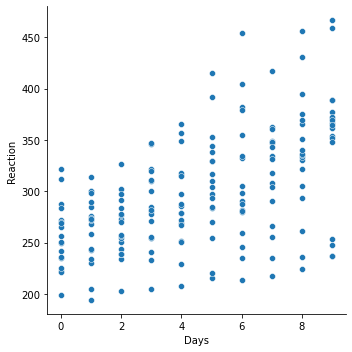

In [95]:
sns.relplot(data=sleep, y='Reaction', x='Days')

### Chi Square Exercises

### Exercise One:
Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [ ]:
alpha = .05
index = ['Uses a Mac Book', 'Does not Own a Mac Book']
columns = ['Codeup_Student', 'Not_Codeup_Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

In [ ]:
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

#### Answer: We Reject the Null Hypothesis (that they are independant) because it the data shows that there IS a relationshiop

________________________________________________________________________________

### Exercise Two:

Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [ ]:
from pydataset import data
mpg = data('mpg')

In [ ]:
mpg.dtypes

Let's use model & transmission to look at relationships.

H0: Model and Transmission of a vehicle are Independant variables from one another.

In [ ]:
observed = pd.crosstab(mpg.model, mpg.trans)
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

In [ ]:
# There is definitely a relationship here

#### Answer: We Reject the Null Hypothesis

___________________________________________________________________________

### Exercise Three:

Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
import pandas as pd
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

salaries = pd.read_sql('SELECT * FROM salaries', url)
titles = pd.read_sql('SELECT * FROM titles', url)
employees = pd.read_sql('SELECT * FROM employees', url)

In [ ]:
departments = pd.read_sql('SELECT * FROM departments', url)
dep_emp = pd.read_sql('SELECT * FROM dept_emp', url)

In [ ]:
e = employees
d = departments
de = dep_emp

In [ ]:
dep_emp

In [ ]:
d.head()

In [ ]:
sql_query = '''
SELECT 
employees.gender,
departments.dept_name
FROM employees
JOIN 
dept_emp ON employees.emp_no = dept_emp.emp_no
JOIN 
departments ON dept_emp.dept_no = departments.dept_no
WHERE departments.dept_name IN ('Sales','Marketing')
AND dept_emp.to_date > NOW();
'''

In [ ]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [ ]:
df = pd.read_sql(sql_query, url)
df.head()

In [ ]:
observed = pd.crosstab(df.gender, df.dept_name)
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

#### Answer: Fail to reject the Null Hypothesis

### Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
#null: gender and job title are independant of one another
#alternative: gender and job title are dependant/relate to one another

In [ ]:
query = '''
SELECT 
employees.gender,
titles.title
FROM employees
JOIN 
titles ON employees.emp_no = titles.emp_no
WHERE titles.title = 'Manager';
'''

In [ ]:
df = pd.read_sql(query, url)
df.head()

In [ ]:
observed = pd.crosstab(df.gender, df.title)
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

#### Answer: We Fail to reject the Null Hypothesis